## Update content of the Atlas - generate maps based on the netcdf data
**Function**      : Plot (tas) maps in a uniform way based on the netcdf files<br>
**Author          : Team BETA**<br>
**First Built**   : 2021.08.02<br>
**Last Update     : 2021.10.01**<br>
**Library**       : os, numpy, netcdf4, matplotlib, cartopy<br>
**Description**   : This notebook serves to extract netcdf data and generate maps for Atlas page.<br>
**Return Values   : png files**<br>
**Note**          : All the maps are generated in a uniform way.<br>

In [1]:
import glob
import os
from pathlib import Path

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from netCDF4 import Dataset

### Path
Specify the path to the dataset and the place to save the outputs. <br>

In [4]:
# please specify data path
datapath = "/mnt/d/NLeSC/BETA/EUCP/Atlas"
# please specify output path
output_path = "../assets/sample_figures/test"
os.makedirs(output_path, exist_ok=True)

### Extract data
Extract weather/climate data from given netCDF files.

In [6]:
# load dataset
dataset_eur_tas_41_60_vs_95_14_jja_cmip6_50prec = Dataset(
    Path(datapath, "Rita_Lukas_Atlas", "eur_CMIP6_tas_2041-2060_vs_1995-2014_50_JJA.nc")
)
# dataset_eur_pr_41_60_jja_cmip6_10prec = Dataset(Path(datapath,
#                                                 'eur_pr_41-60_jja_cmip6_10perc_rel.nc'))
# dataset_eur_tas_41_60_jja_cmip6_50prec = Dataset(Path(datapath,
#                                                 'eur_tas_41-60_jja_cmip6_50perc.nc'))

In [7]:
# extract data
eur_tas_41_60_vs_95_14_jja_cmip6_50prec = (
    dataset_eur_tas_41_60_vs_95_14_jja_cmip6_50prec.variables["tas_weighted"][:]
)
lat_eur_tas_41_60_vs_95_14_jja_cmip6_50prec = (
    dataset_eur_tas_41_60_vs_95_14_jja_cmip6_50prec.variables["lat"][:]
)
lon_eur_tas_41_60_vs_95_14_jja_cmip6_50prec = (
    dataset_eur_tas_41_60_vs_95_14_jja_cmip6_50prec.variables["lon"][:]
)

In [8]:
# choose color map
cmap_prec = "BrBG"
cmap_tas = "coolwarm"
# label color bar
# label = [-200, -100, 0 , 100, 200]
# ticks = [-200, -100, 0 , 100, 200]

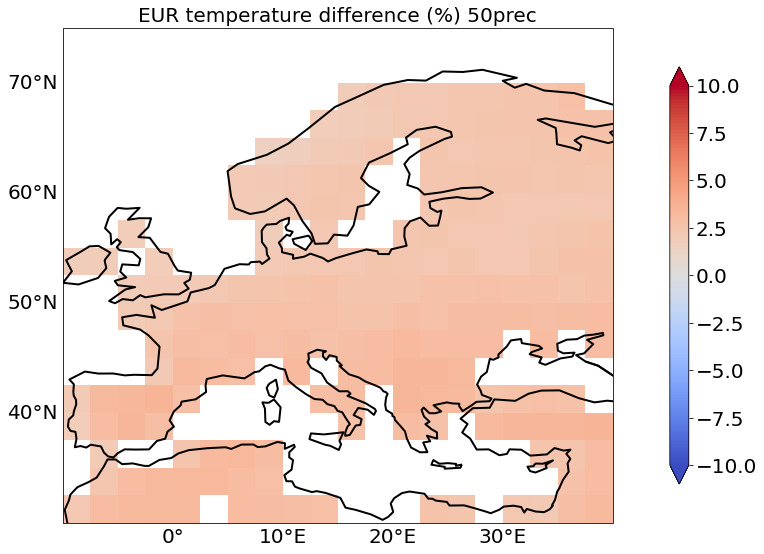

In [11]:
# plot figure
# more options about plotting with cartopy can be found via
# https://github.com/geek-yang/Energy-Wizard/blob/master/Postprocessing/visualization_gallery.py

fig = plt.figure(figsize=(12.8, 9.6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-10, 40, 30, 75], ccrs.PlateCarree())  # East, West, South, Nouth
ax.coastlines(resolution="110m", color="black", linewidth=2)
gl = ax.gridlines(
    crs=ccrs.PlateCarree(),
    draw_labels=True,
    linewidth=1,
    color="gray",
    alpha=0.5,
    linestyle="--",
)
gl.xlabels_top = False
gl.xlabels_bottom = True
gl.ylabels_left = True
gl.ylabels_right = False
gl.xlines = False
gl.ylines = False
# specify the location of labels
# gl.xlocator = mticker.FixedLocator([-10, 0, 10, 20, 30, 40])
# gl.ylocator = mticker.FixedLocator([30, 40, 50, 60, 70])
# specify label styles
gl.xlabel_style = {"size": 20, "color": "black"}
gl.ylabel_style = {"size": 20, "color": "black"}
cs = plt.pcolormesh(
    lon_eur_tas_41_60_vs_95_14_jja_cmip6_50prec,
    lat_eur_tas_41_60_vs_95_14_jja_cmip6_50prec,
    eur_tas_41_60_vs_95_14_jja_cmip6_50prec,
    cmap=cmap_tas,
    vmin=-10,
    vmax=10,
)
cbar = fig.colorbar(
    cs, extend="both", orientation="vertical", shrink=0.8, pad=0.08, spacing="uniform"
)  # , format="%.1f")
# cbar.set_label(label,size = 9)
# cbar.set_ticks(ticks)
cbar.ax.tick_params(labelsize=20)
ax.set_title("EUR temperature difference (degC) 50 prec", fontsize=20)
# plt.tight_layout()
plt.show()
fig.savefig(Path(output_path, "test_tas.png"), dpi=150)